### Predict the annual turnover of a restaurant based on the variables provided in the data set

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.impute import KNNImputer
from scipy.stats import mode, iqr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Reading the train and test csv files as dataframes
res_train_df=pd.read_csv("Train_dataset.csv")
res_test_df=pd.read_csv("Test_dataset.csv")

In [3]:
res_train_df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [4]:
res_test_df.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [5]:
#Making a copy of dataframes to avoid the loss of information or avoid changes to original dataset
res_train_df_copy=res_train_df.copy()
res_test_df_copy=res_test_df.copy()

In [6]:
res_train_df_copy.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [7]:
res_test_df_copy.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [8]:
res_train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

From the above we can observe that the Live Sports Rating has very least values and then followed by Value deals Rating,Comedy Gigs Rating

In [9]:
res_test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant Location            500 non-null    object 
 4   Opening Day of Restaurant      500 non-null    object 
 5   Facebook Popularity Quotient   500 non-null    float64
 6   Endoresed By                   500 non-null    object 
 7   Instagram Popularity Quotient  500 non-null    float64
 8   Fire Audit                     500 non-null    int64  
 9   Liquor License Obtained        500 non-null    int64  
 10  Situated in a Multi Complex    500 non-null    int64  
 11  Dedicated Parking              500 non-null    int64  
 12  Open Sitting Available         500 non-null    int

The same followed with the test data where the Live Sports Rating has very least values and then followed by Value deals Rating,Comedy Gigs Rating

In [10]:
res_train_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,6.174700e+04,1.008487e+03,60001.0,60874.0,61747.00,6.262000e+04,6.349300e+04
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook Popularity Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram Popularity Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Fire Audit,3493.0,7.887203e-01,4.082748e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Liquor License Obtained,3493.0,9.882622e-01,1.077187e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Situated in a Multi Complex,3493.0,8.081878e-01,3.937825e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Dedicated Parking,3493.0,8.018895e-01,3.986329e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Open Sitting Available,3493.0,8.001718e-01,3.999284e-01,0.0,1.0,1.00,1.000000e+00,1.000000e+00
Resturant Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00


### Insights:

The dataset includes diverse features related to restaurant characteristics, ratings, and other attributes.

The majority of binary features like fire audit, liquor license obtained, etc., are often present.

The restaurant ratings, both from Zomato and overall, seem to be moderate to high on average.

The turnover of the restaurants varies widely, indicating a diverse set of establishments.

The dataset has missing values for some features like "Overall Restaurant Rating," "Live Music Rating," "Comedy Gigs Rating," "Value Deals Rating," and "Live Sports Rating."

In [11]:
res_test_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,500.0,20250.500000,144.481833,20001.0,20125.750,20250.5,20375.2500,20500.0
Facebook Popularity Quotient,500.0,77.541240,10.083617,46.0,70.575,79.0,85.2325,96.8
Instagram Popularity Quotient,500.0,74.753260,11.337201,47.0,65.915,75.0,83.6000,97.2
Fire Audit,500.0,0.814000,0.389496,0.0,1.000,1.0,1.0000,1.0
Liquor License Obtained,500.0,0.986000,0.117608,0.0,1.000,1.0,1.0000,1.0
Situated in a Multi Complex,500.0,0.788000,0.409134,0.0,1.000,1.0,1.0000,1.0
Dedicated Parking,500.0,0.808000,0.394268,0.0,1.000,1.0,1.0000,1.0
Open Sitting Available,500.0,0.804000,0.397366,0.0,1.000,1.0,1.0000,1.0
Resturant Tier,500.0,1.932000,0.251998,1.0,2.000,2.0,2.0000,2.0
Restaurant Zomato Rating,500.0,2.704000,0.778200,1.0,2.000,3.0,3.0000,5.0


### Insights:
The dataset seems to be relatively complete for most features, as the counts for each column are close to 500.

The ratings for live music, comedy gigs, value deals, and live sports have lower counts, indicating missing values in these columns.


In [12]:
res_train_df_copy.isna().apply(pd.value_counts)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
False,3493.0,3493.0,3493.0,3493.0,3493.0,3493.0,3394,3493.0,3437,3493.0,...,3281,2728,1010,786,205,3468,3493.0,3493.0,3493.0,3493.0
True,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,56,NaN,...,212,765,2483,2707,3288,25,NaN,NaN,NaN,NaN


In [13]:
res_test_df_copy.isna().apply(pd.value_counts)

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
False,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,466,398,130,115,29,500.0,500.0,500.0,500.0,500.0
True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,102,370,385,471,NaN,NaN,NaN,NaN,NaN


In [14]:
def check_missing_values(df):
    """
    Check for null or NaN values in a DataFrame and calculate count and percentage.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - missing_values_info: DataFrame containing column names, count, and percentage of missing values
    """

    total_records = len(df)
    missing_values_info = pd.DataFrame(columns=['Column Name', 'Missing Count', 'Percentage Missing'])

    for column in df.columns:
        missing_count = df[column].isnull().sum()
        percentage_missing = (missing_count / total_records) * 100
        missing_values_info = missing_values_info.append({
            'Column Name': column,
            'Missing Count': missing_count,
            'Percentage Missing': percentage_missing
        }, ignore_index=True)

    return missing_values_info


In [15]:
check_missing_values(res_train_df_copy)

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.appen

,Column Name,Missing Count,Percentage Missing
0,Registration Number,0,0.000000
1,Annual Turnover,0,0.000000
2,Cuisine,0,0.000000
3,City,0,0.000000
4,Restaurant Location,0,0.000000
5,Opening Day of Restaurant,0,0.000000
6,Facebook Popularity Quotient,99,2.834240
7,Endorsed By,0,0.000000
8,Instagram Popularity Quotient,56,1.603206
9,Fire Audit,0,0.000000


We can observe that 94% of null values are present in the live sports rating and then folllowed by value deals rating, comedy gigs rating

In [16]:
check_missing_values(res_test_df_copy)

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.appen

,Column Name,Missing Count,Percentage Missing
0,Registration Number,0,0.0
1,Cuisine,0,0.0
2,City,0,0.0
3,Restaurant Location,0,0.0
4,Opening Day of Restaurant,0,0.0
5,Facebook Popularity Quotient,0,0.0
6,Endoresed By,0,0.0
7,Instagram Popularity Quotient,0,0.0
8,Fire Audit,0,0.0
9,Liquor License Obtained,0,0.0


We can observe the same in test data that 94% of null values are present in the live sports rating and then folllowed by value deals rating, comedy gigs rating

In [17]:
def display_unique_values(df):
    """
    Display unique values of each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - unique_values: Dictionary containing column names and their unique values
    """

    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()

    return unique_values

In [18]:
#Calling the function to check null values in train set
display_unique_values(res_train_df_copy)

{'Registration Number': array([60001, 60002, 60003, ..., 63491, 63492, 63493], dtype=int64),
 'Annual Turnover': array([ 42000000,  50000000,  32500000, 110000000,  20000000,  30000000,
         40000000,  60000000,  23000000,  45000000,  27000000,  35000000,
         25000000,  12000000,  32000000,  19000000,  18000000,  33500000,
         43500000,  34500000,  14500000,  22000000,  53000000,  34000000,
         36000000,  21500000,   8000000,  33000000,  38000000,  11000000,
         20500000,   9500000,  39000000,   6000000,  24000000,  52500000,
         30500000,  15000000,  31000000,  45500000,  80000000,  10000000,
         28000000,  44500000,  31500000,  37000000,  27500000, 150000000,
         42500000,  47000000,  46000000,  51000000,  48000000,  17000000,
         64000000,  22500000,  44000000, 120000000,  67500000,  10500000,
         19500000,  38500000,  23500000,  61500000,  29000000,  14000000,
         40500000, 186000000,  37500000,  43000000,  66000000,   7000000,


From above we can observe that city is having a numerical value and the following fields are having the NAN values they are Facebook Popularity Quotient,instagram popularity quotient,Resturant type,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience

In [19]:
#Calling the function to check null values in test set
display_unique_values(res_test_df_copy)

{'Registration Number': array([20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009,
        20010, 20011, 20012, 20013, 20014, 20015, 20016, 20017, 20018,
        20019, 20020, 20021, 20022, 20023, 20024, 20025, 20026, 20027,
        20028, 20029, 20030, 20031, 20032, 20033, 20034, 20035, 20036,
        20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044, 20045,
        20046, 20047, 20048, 20049, 20050, 20051, 20052, 20053, 20054,
        20055, 20056, 20057, 20058, 20059, 20060, 20061, 20062, 20063,
        20064, 20065, 20066, 20067, 20068, 20069, 20070, 20071, 20072,
        20073, 20074, 20075, 20076, 20077, 20078, 20079, 20080, 20081,
        20082, 20083, 20084, 20085, 20086, 20087, 20088, 20089, 20090,
        20091, 20092, 20093, 20094, 20095, 20096, 20097, 20098, 20099,
        20100, 20101, 20102, 20103, 20104, 20105, 20106, 20107, 20108,
        20109, 20110, 20111, 20112, 20113, 20114, 20115, 20116, 20117,
        20118, 20119, 20120, 20121, 20122, 20123, 2012

From above we can observe that city is having a numerical value and the following fields are having the NAN values they are Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating

In [20]:
#Conveting the Oject type of Opening Day of Restaurant to DateTime Format
res_train_df_copy['Opening Day of Restaurant'] = pd.to_datetime(res_train_df_copy['Opening Day of Restaurant'])

In [21]:
res_train_df_copy.dtypes

Registration Number                       int64
Annual Turnover                           int64
Cuisine                                  object
City                                     object
Restaurant Location                      object
Opening Day of Restaurant        datetime64[ns]
Facebook Popularity Quotient            float64
Endorsed By                              object
Instagram Popularity Quotient           float64
Fire Audit                                int64
Liquor License Obtained                   int64
Situated in a Multi Complex               int64
Dedicated Parking                         int64
Open Sitting Available                    int64
Resturant Tier                          float64
Restaurant Type                          object
Restaurant Theme                         object
Restaurant Zomato Rating                  int64
Restaurant City Tier                      int64
Order Wait Time                           int64
Staff Responsivness                     

In [22]:
#Conveting the Oject type of Opening Day of Restaurant to DateTime Format
res_test_df_copy['Opening Day of Restaurant'] = pd.to_datetime(res_test_df_copy['Opening Day of Restaurant'])

In [23]:
res_test_df_copy.dtypes

Registration Number                       int64
Cuisine                                  object
City                                     object
Restaurant Location                      object
Opening Day of Restaurant        datetime64[ns]
Facebook Popularity Quotient            float64
Endoresed By                             object
Instagram Popularity Quotient           float64
Fire Audit                                int64
Liquor License Obtained                   int64
Situated in a Multi Complex               int64
Dedicated Parking                         int64
Open Sitting Available                    int64
Resturant Tier                            int64
Restaurant Type                          object
Restaurant Theme                         object
Restaurant Zomato Rating                  int64
Restaurant City Tier                      int64
Order Wait Time                           int64
Staff Responsivness                       int64
Value for Money                         

In [24]:
# Drop multiple columns from both train and test DataFrames
columns_to_drop = ['Live Sports Rating', 'Comedy Gigs Rating', 'Value Deals Rating']

res_train_df_copy = res_train_df_copy.drop(columns=columns_to_drop)
res_test_df_copy = res_test_df_copy.drop(columns=columns_to_drop)

In [25]:
res_train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Registration Number            3493 non-null   int64         
 1   Annual Turnover                3493 non-null   int64         
 2   Cuisine                        3493 non-null   object        
 3   City                           3493 non-null   object        
 4   Restaurant Location            3493 non-null   object        
 5   Opening Day of Restaurant      3493 non-null   datetime64[ns]
 6   Facebook Popularity Quotient   3394 non-null   float64       
 7   Endorsed By                    3493 non-null   object        
 8   Instagram Popularity Quotient  3437 non-null   float64       
 9   Fire Audit                     3493 non-null   int64         
 10  Liquor License Obtained        3493 non-null   int64         
 11  Situated in a Mul

In [26]:
res_test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Registration Number            500 non-null    int64         
 1   Cuisine                        500 non-null    object        
 2   City                           500 non-null    object        
 3   Restaurant Location            500 non-null    object        
 4   Opening Day of Restaurant      500 non-null    datetime64[ns]
 5   Facebook Popularity Quotient   500 non-null    float64       
 6   Endoresed By                   500 non-null    object        
 7   Instagram Popularity Quotient  500 non-null    float64       
 8   Fire Audit                     500 non-null    int64         
 9   Liquor License Obtained        500 non-null    int64         
 10  Situated in a Multi Complex    500 non-null    int64         
 11  Dedicated Parking  

In [27]:
#checking for duplicate entries
res_train_df_copy.duplicated().sum()

0

In [28]:
#checking for duplicate entries
res_test_df_copy.duplicated().sum()

0

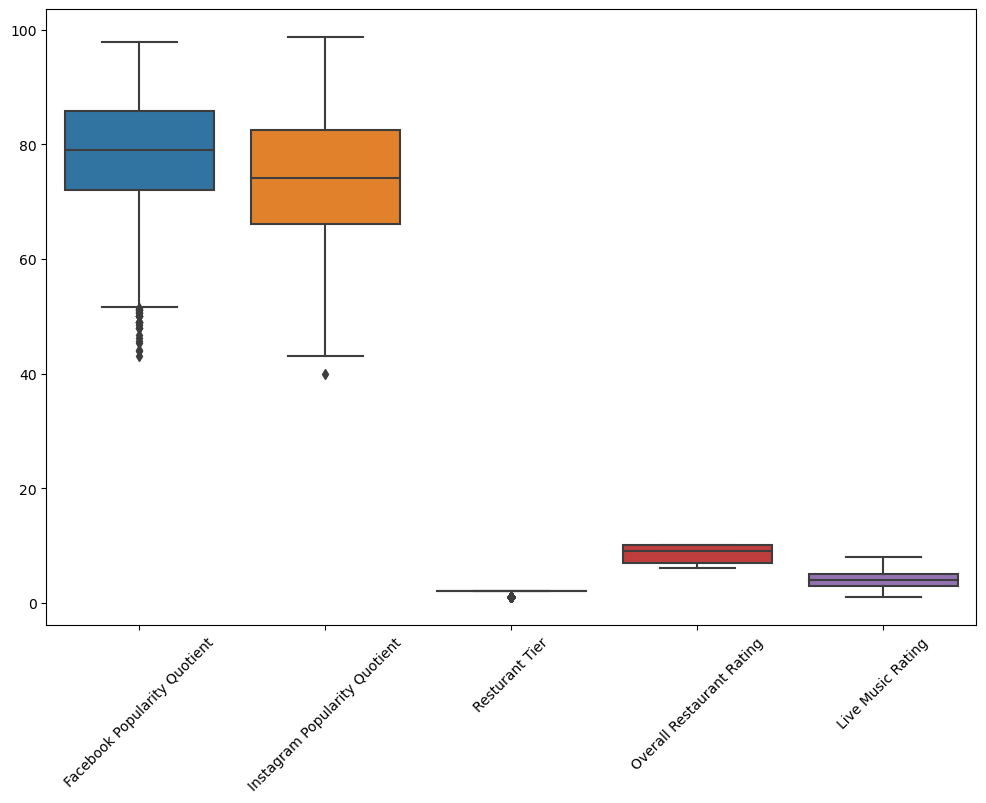

In [29]:
# Checking the outliers for missing values
columns_to_check = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Resturant Tier',
                     'Overall Restaurant Rating', 'Live Music Rating']
plt.figure(figsize=(12, 8))
sns.boxplot(data=res_train_df_copy[columns_to_check])
plt.xticks(rotation=45)
plt.show()

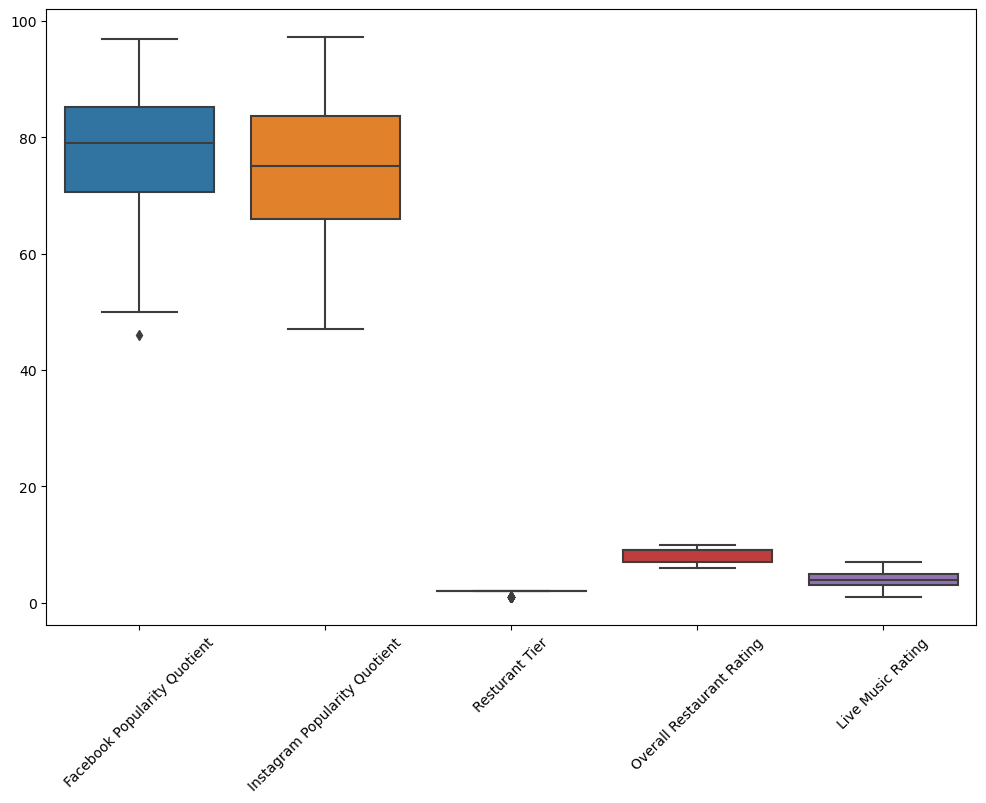

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=res_test_df_copy[columns_to_check])
plt.xticks(rotation=45)
plt.show()

AS we have observed that the Facebook Popularity Quotient & Resturant Tier has the outliers near to the IQR we are imputing the missed values near to the outliers 

In [31]:
res_train_df_copy['Facebook Popularity Quotient'].fillna(res_train_df_copy['Facebook Popularity Quotient'].mean(), inplace=True)

In [32]:
res_test_df_copy['Facebook Popularity Quotient'].fillna(res_test_df_copy['Facebook Popularity Quotient'].mean(), inplace=True)

In [33]:
res_train_df_copy['Instagram Popularity Quotient'].fillna(res_train_df_copy['Instagram Popularity Quotient'].mean(), inplace=True)

In [34]:
res_test_df_copy['Instagram Popularity Quotient'].fillna(res_test_df_copy['Instagram Popularity Quotient'].mean(), inplace=True)

In [35]:
imputer = KNNImputer(n_neighbors=3)
res_train_df_copy[['Overall Restaurant Rating', 'Live Music Rating', 'Ambience','Live Music Rating']] = imputer.fit_transform(res_train_df_copy[['Overall Restaurant Rating', 'Live Music Rating', 'Ambience','Live Music Rating']])

In [36]:
res_test_df_copy[['Overall Restaurant Rating', 'Live Music Rating', 'Ambience','Live Music Rating']] = imputer.fit_transform(res_test_df_copy[['Overall Restaurant Rating', 'Live Music Rating', 'Ambience','Live Music Rating']])

In [37]:
# Identify the column you want to impute
column_to_impute = 'Resturant Tier'

# Create a SimpleImputer with the strategy as 'most_frequent' (mode)
imputer_simple = SimpleImputer(strategy='most_frequent')
# Impute missing values in the specific column
res_train_df_copy[column_to_impute] = imputer_simple.fit_transform(res_train_df_copy[[column_to_impute]])



In [38]:
check_missing_values(res_train_df_copy)

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.appen

,Column Name,Missing Count,Percentage Missing
0,Registration Number,0,0.0
1,Annual Turnover,0,0.0
2,Cuisine,0,0.0
3,City,0,0.0
4,Restaurant Location,0,0.0
5,Opening Day of Restaurant,0,0.0
6,Facebook Popularity Quotient,0,0.0
7,Endorsed By,0,0.0
8,Instagram Popularity Quotient,0,0.0
9,Fire Audit,0,0.0


In [39]:
check_missing_values(res_test_df_copy)

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.append({
C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2128879950.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_values_info = missing_values_info.appen

,Column Name,Missing Count,Percentage Missing
0,Registration Number,0,0.0
1,Cuisine,0,0.0
2,City,0,0.0
3,Restaurant Location,0,0.0
4,Opening Day of Restaurant,0,0.0
5,Facebook Popularity Quotient,0,0.0
6,Endoresed By,0,0.0
7,Instagram Popularity Quotient,0,0.0
8,Fire Audit,0,0.0
9,Liquor License Obtained,0,0.0


In [40]:
res_train_df_copy.isna().apply(pd.value_counts)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
False,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,...,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493


In [41]:
#  'Opening Day of Restaurant' is the datetime column
res_train_df_copy['Opening Day of Restaurant'] = pd.to_datetime(res_train_df_copy['Opening Day of Restaurant'])

# Extract year, month, and day into separate columns
res_train_df_copy['Year'] = res_train_df_copy['Opening Day of Restaurant'].dt.year
res_train_df_copy['Month'] = res_train_df_copy['Opening Day of Restaurant'].dt.month
res_train_df_copy['Day'] = res_train_df_copy['Opening Day of Restaurant'].dt.day

# Drop the original datetime column if needed
res_train_df_copy.drop('Opening Day of Restaurant', axis=1, inplace=True)

# Display the updated DataFrame
print(res_train_df_copy.head())

   Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location  Facebook Popularity Quotient       Endorsed By  \
0   Near Business Hub                     84.300000      Not Specific   
1      Near Party Hub                     85.400000  Tier A Celebrity   
2   Near Business Hub                     85.000000  Tier A Celebrity   
3      Near Party Hub                     85.600000  Tier A Celebrity   
4      Near Party Hub                     77.938715  Tier A Celebrity   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...  \
0                           95.8           1      

In [42]:
#  'Opening Day of Restaurant' is the datetime column
res_test_df_copy['Opening Day of Restaurant'] = pd.to_datetime(res_test_df_copy['Opening Day of Restaurant'])

# Extract year, month, and day into separate columns
res_test_df_copy['Year'] = res_test_df_copy['Opening Day of Restaurant'].dt.year
res_test_df_copy['Month'] = res_test_df_copy['Opening Day of Restaurant'].dt.month
res_test_df_copy['Day'] = res_test_df_copy['Opening Day of Restaurant'].dt.day

# Drop the original datetime column if needed
res_test_df_copy.drop('Opening Day of Restaurant', axis=1, inplace=True)

# Display the updated DataFrame
print(res_test_df_copy.head())


   Registration Number           Cuisine       City Restaurant Location  \
0                20001   tibetan,italian  Bangalore   Near Business Hub   
1                20002   tibetan,italian  Hyderabad      Near Party Hub   
2                20003  algerian,belgian  Hyderabad      Near Party Hub   
3                20004     tibetan,greek         -1      Near Party Hub   
4                20005     cuban,british      Pune       Near Party Hub   

   Facebook Popularity Quotient      Endoresed By  \
0                         78.00  Tier A Celebrity   
1                         89.17      Not Specific   
2                         84.00      Not Specific   
3                         79.38      Not Specific   
4                         84.67      Not Specific   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
0                          69.00           1                        1   
1                          96.00           1                        1   
2          

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\464858537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = res_train_df_copy.corr()


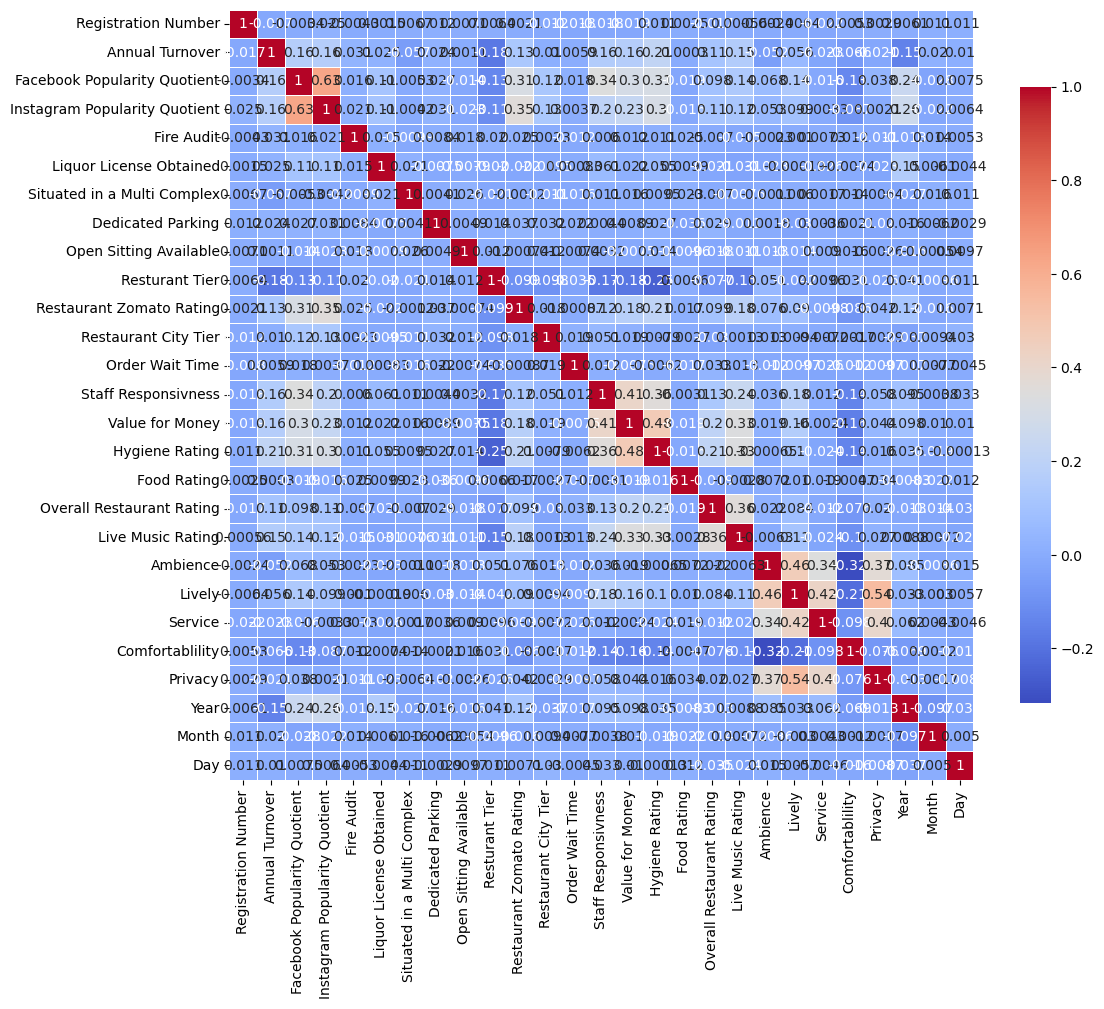

In [43]:
# Calculate the correlation matrix
correlation_matrix = res_train_df_copy.corr()

# Create a heatmap with adjusted cell width
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.show()

Here we can observe that there is a positive correlation between the Facebook Popularity Quotient & Instagram Popularity Quotient,Instagram Popularity Quotient	& Restaurant Zomato Rating, Facebook Popularity Quotient & Staff Responsivness,Value for Money & Hygiene Rating, Live Music Rating & Value for Money,Ambience & Lively, Lively & Privacy, Lively & Service

Negative correlation between the Ambience & Comfortability

Columns with outliers:
Annual Turnover                  True
Facebook Popularity Quotient     True
Instagram Popularity Quotient    True
Fire Audit                       True
Liquor License Obtained          True
Situated in a Multi Complex      True
Dedicated Parking                True
Open Sitting Available           True
Resturant Tier                   True
Restaurant Zomato Rating         True
Staff Responsivness              True
Value for Money                  True
Ambience                         True
Lively                           True
Comfortablility                  True
Privacy                          True
Year                             True
dtype: bool


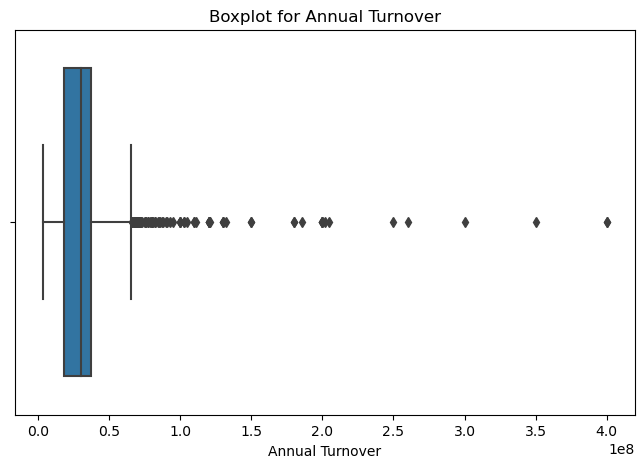

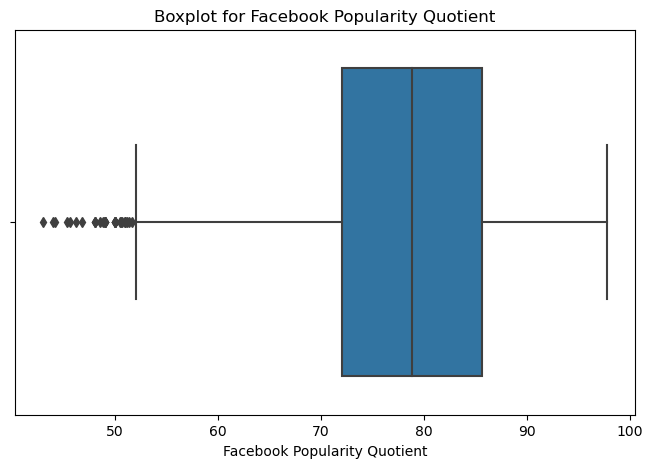

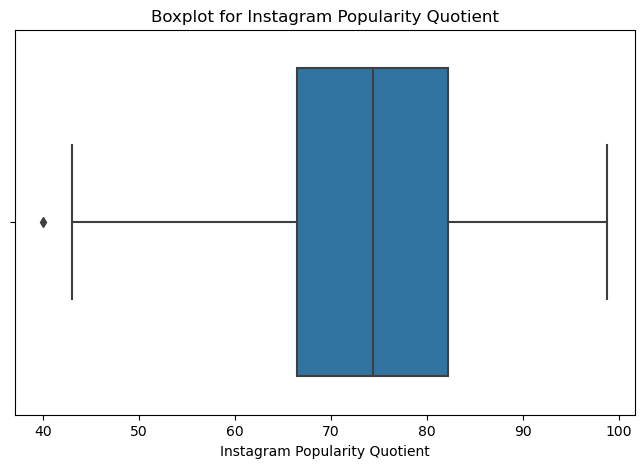

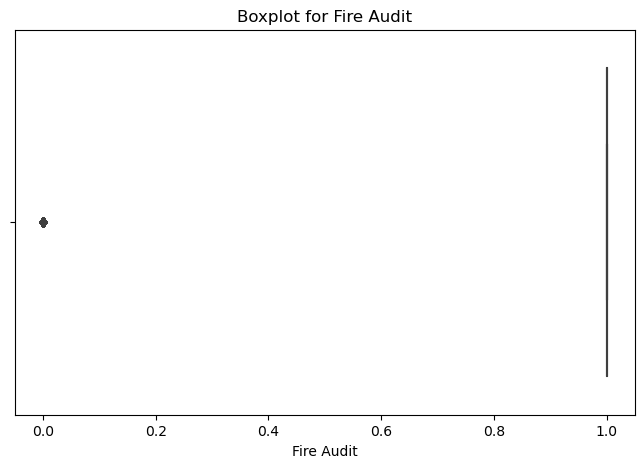

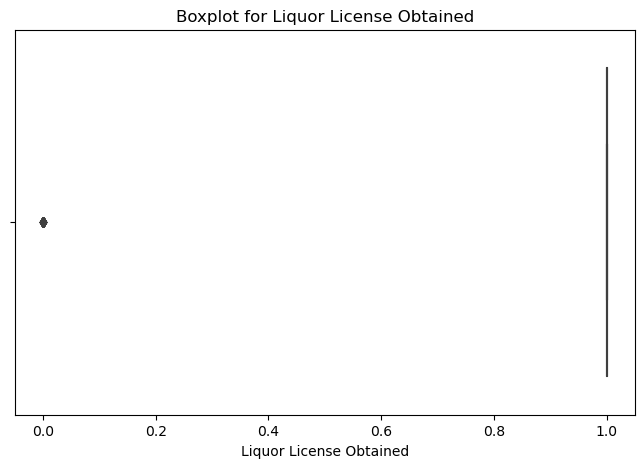

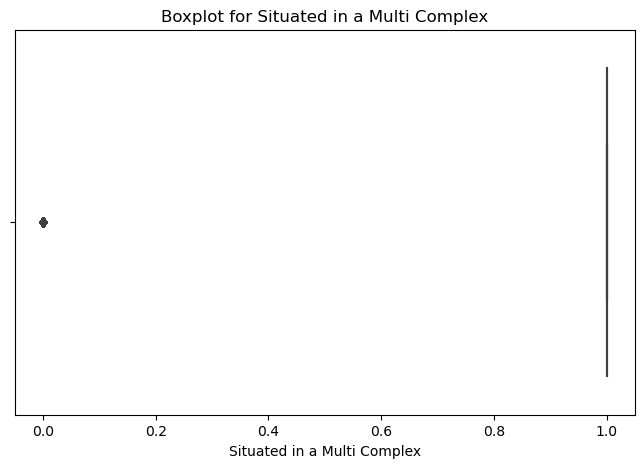

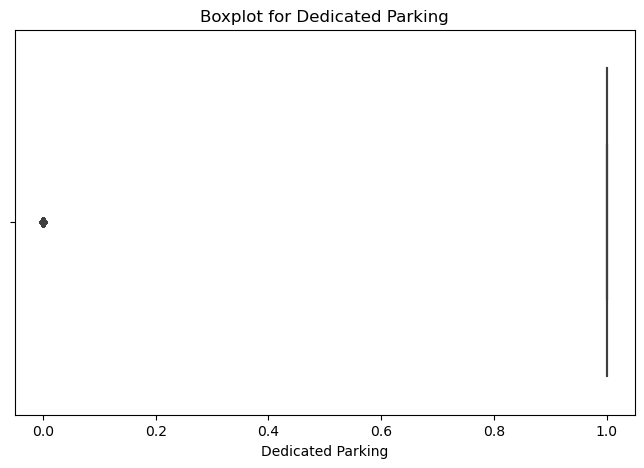

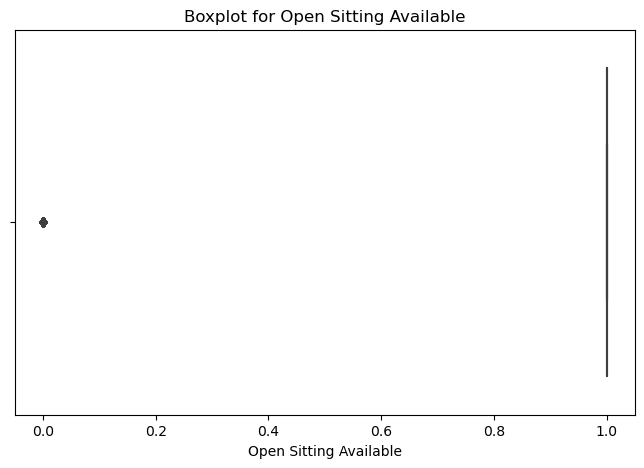

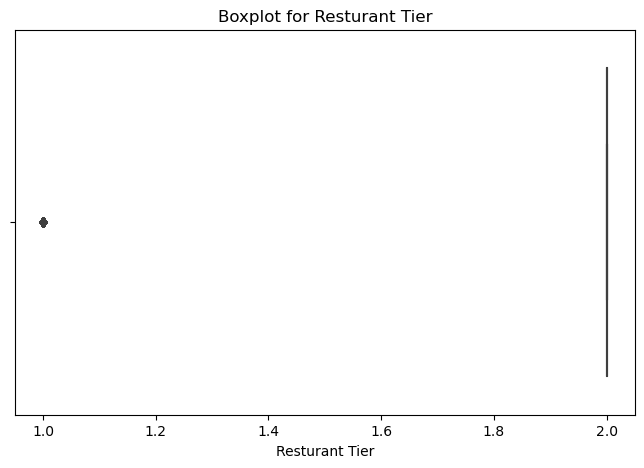

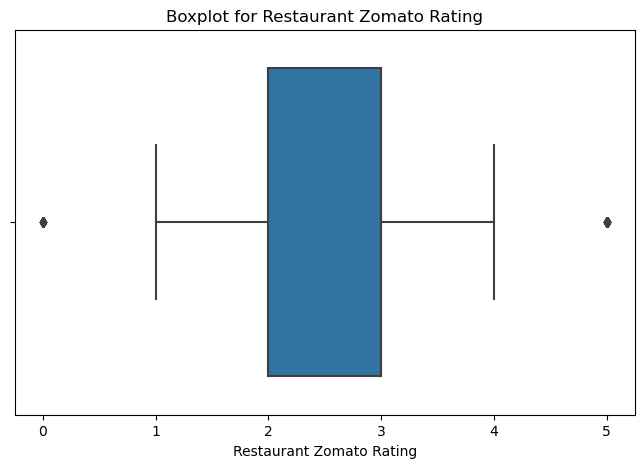

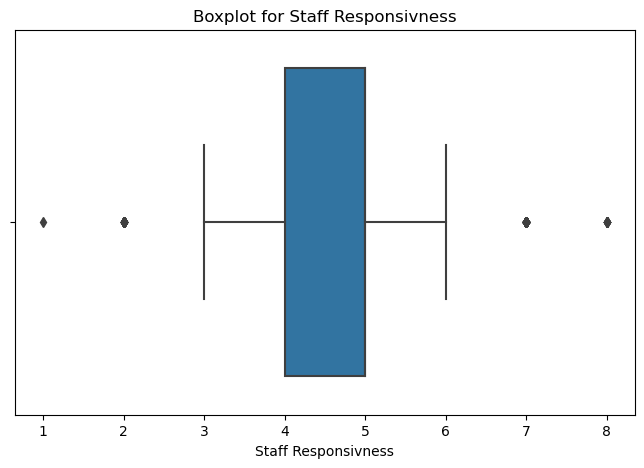

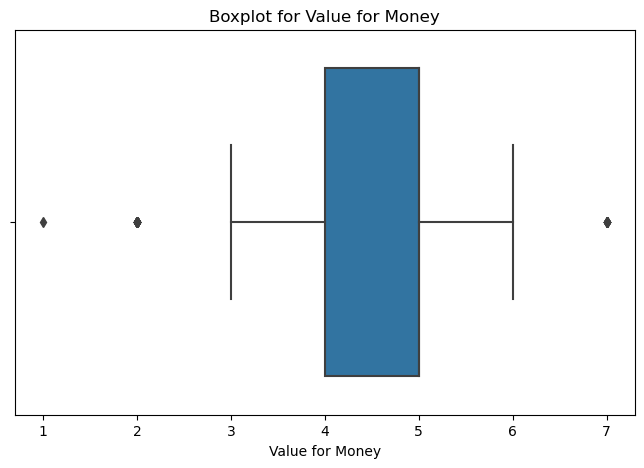

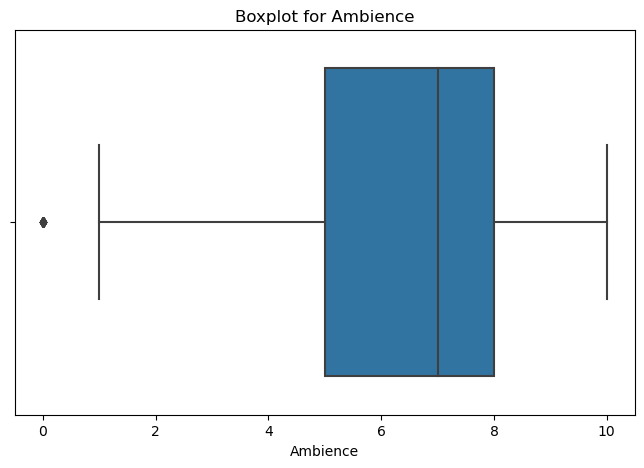

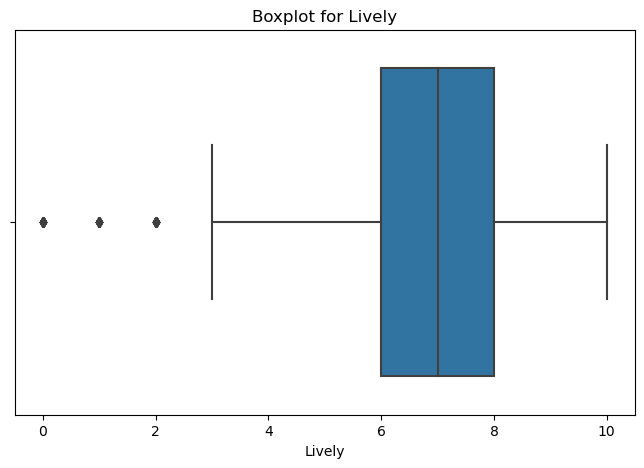

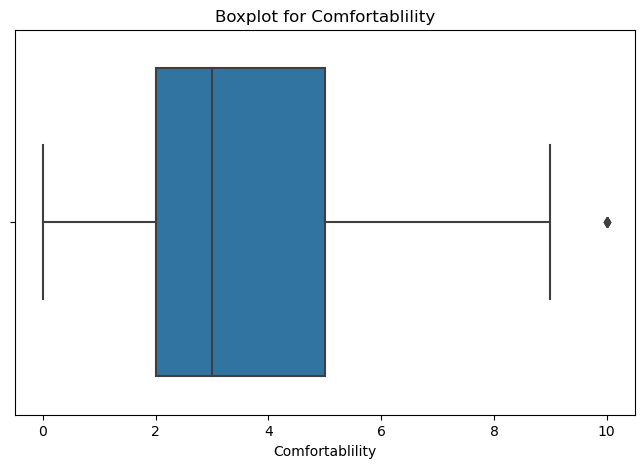

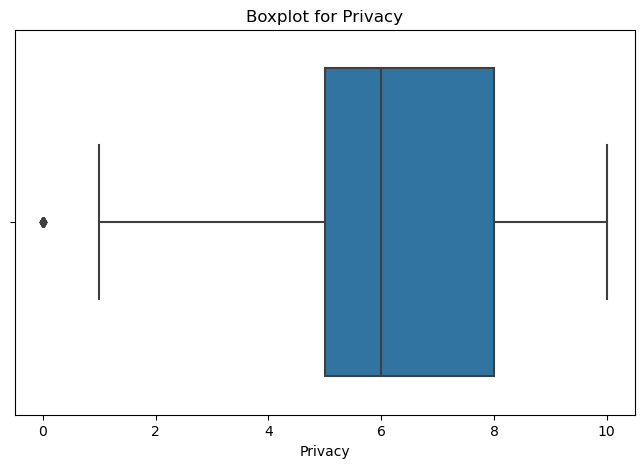

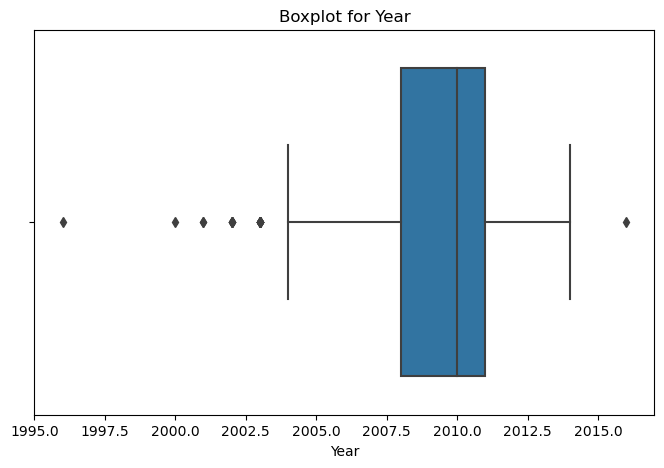

In [44]:

# Filter only numeric columns
numeric_cols = res_train_df_copy.select_dtypes(include=['number']).columns

# Calculate the IQR for each column
Q1 = res_train_df_copy[numeric_cols].quantile(0.25)
Q3 = res_train_df_copy[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers in a column
def find_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = (res_train_df_copy[column] < lower_bound) | (res_train_df_copy[column] > upper_bound)
    return outliers

# Apply the function to each column and create a DataFrame of outliers
outliers_df = pd.DataFrame({column: find_outliers(column) for column in numeric_cols})

# Print columns with outliers
columns_with_outliers = outliers_df.any()
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers])

# Optionally, you can visualize the outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for columns with outliers
for column in columns_with_outliers.index:
    if columns_with_outliers[column]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=res_train_df_copy[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

In [45]:
# List of columns you want to winsorize
columns_to_winsorize = ['Annual Turnover', 'Facebook Popularity Quotient', 'Instagram Popularity Quotient',
'Instagram Popularity Quotient',
'Fire Audit',                       
'Liquor License Obtained',         
'Situated in a Multi Complex',      
'Dedicated Parking',                
'Open Sitting Available',           
'Resturant Tier' ,                 
'Restaurant Zomato Rating' ,       
'Staff Responsivness' ,             
'Value for Money',                  
'Ambience' ,                        
'Lively' ,                          
'Comfortablility' ,                 
'Privacy',                          
'Year'        ]

# Apply Winsorizing to each column
for column in columns_to_winsorize:
    res_train_df_copy[column] = winsorize(res_train_df_copy[column], limits=[0.05, 0.05])

In [46]:
# List of columns you want to winsorize
columns_to_winsorize = [ 'Facebook Popularity Quotient', 'Instagram Popularity Quotient',
'Instagram Popularity Quotient',
'Fire Audit',                       
'Liquor License Obtained',         
'Situated in a Multi Complex',      
'Dedicated Parking',                
'Open Sitting Available',           
'Resturant Tier' ,                 
'Restaurant Zomato Rating' ,       
'Staff Responsivness' ,             
'Value for Money',                  
'Ambience' ,                        
'Lively' ,                          
'Comfortablility' ,                 
'Privacy',                          
'Year'        ]

# Apply Winsorizing to each column
for column in columns_to_winsorize:
    res_test_df_copy[column] = winsorize(res_test_df_copy[column], limits=[0.05, 0.05])

In [47]:
sns.pairplot(res_train_df_copy, diag_kind='kde', height=3)  # Adjust the height parameter as needed

plt.show()

In [49]:
res_train_df_copy['Popularity_Interaction'] = res_train_df_copy['Facebook Popularity Quotient'] * res_train_df_copy['Instagram Popularity Quotient']
res_test_df_copy['Popularity_Interaction'] = res_test_df_copy['Facebook Popularity Quotient'] * res_test_df_copy['Instagram Popularity Quotient']


In [50]:
res_train_df_copy['Rating_Interaction'] = res_train_df_copy['Restaurant Zomato Rating'] * res_train_df_copy['Overall Restaurant Rating']
res_test_df_copy['Rating_Interaction'] = res_test_df_copy['Restaurant Zomato Rating'] * res_test_df_copy['Overall Restaurant Rating']

In [51]:
res_train_df_copy['Service_Interaction'] = res_train_df_copy['Staff Responsivness'] * res_train_df_copy['Service']
res_test_df_copy['Service_Interaction'] = res_test_df_copy['Staff Responsivness'] * res_test_df_copy['Service']

In [52]:
res_train_df_copy['Popularity_Interaction'] = res_train_df_copy['Facebook Popularity Quotient'] * res_train_df_copy['Instagram Popularity Quotient']
res_test_df_copy['Popularity_Interaction'] = res_test_df_copy['Facebook Popularity Quotient'] * res_test_df_copy['Instagram Popularity Quotient']

In [53]:
res_train_df_copy['Time_Interaction'] = res_train_df_copy['Month'] * res_train_df_copy['Day']
res_test_df_copy['Time_Interaction'] = res_test_df_copy['Month'] * res_test_df_copy['Day']


In [54]:
res_test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant Location            500 non-null    object 
 4   Facebook Popularity Quotient   500 non-null    float64
 5   Endoresed By                   500 non-null    object 
 6   Instagram Popularity Quotient  500 non-null    float64
 7   Fire Audit                     500 non-null    int64  
 8   Liquor License Obtained        500 non-null    int64  
 9   Situated in a Multi Complex    500 non-null    int64  
 10  Dedicated Parking              500 non-null    int64  
 11  Open Sitting Available         500 non-null    int64  
 12  Resturant Tier                 500 non-null    int

In [55]:
res_train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3493 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-null   i

In [56]:
train_data = res_train_df_copy.copy()
test_data = res_test_df_copy.copy()

# Identify categorical columns
categorical_columns = ['Cuisine', 'City', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']

# Concatenate the training and test sets to ensure one-hot encoding consistency
combined_data = pd.concat([train_data, test_data], axis=0)

# Apply one-hot encoding
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_columns)

# Split the combined data back into training and test sets
train_data_encoded = combined_data_encoded.iloc[:len(train_data)]
test_data_encoded = combined_data_encoded.iloc[len(train_data):]

# Handle missing columns in the test set
missing_columns = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for column in missing_columns:
    test_data_encoded[column] = 0


In [57]:
print("Train Data Encoded:")
print(train_data_encoded.head())

print("\nTest Data Encoded:")
print(test_data_encoded.head())

Train Data Encoded:
   Registration Number  Annual Turnover Restaurant Location  \
0                60001       42000000.0   Near Business Hub   
1                60002       50000000.0      Near Party Hub   
2                60003       32500000.0   Near Business Hub   
3                60004       57000000.0      Near Party Hub   
4                60005       20000000.0      Near Party Hub   

   Facebook Popularity Quotient  Instagram Popularity Quotient  Fire Audit  \
0                     84.300000                           92.8           1   
1                     85.400000                           85.0           1   
2                     85.000000                           68.2           1   
3                     85.600000                           83.6           0   
4                     77.938715                           76.8           1   

   Liquor License Obtained  Situated in a Multi Complex  Dedicated Parking  \
0                        1                            

In [58]:
# Split the data into features (X) and target variable (y)
X = train_data_encoded.drop('Annual Turnover', axis=1)  # Features excluding Annual_Turnover
y = train_data_encoded['Annual Turnover']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (2794, 427) (2794,)
Validation set shape: (699, 427) (699,)


In [59]:
# Select numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Apply the same transformation to the validation set
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [60]:
# Use the same scaler to transform the test data DataFrame
test_data_encoded[numeric_cols] = scaler.transform(test_data_encoded[numeric_cols])

C:\Users\HP\AppData\Local\Temp\ipykernel_16396\2954040878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_encoded[numeric_cols] = scaler.transform(test_data_encoded[numeric_cols])


In [61]:
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(X_train[numeric_cols].values, i) for i in range(X_train[numeric_cols].shape[1])]

# Display the VIF values
print(vif_data)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                         Variable         VIF
0             Registration Number    1.010490
1    Facebook Popularity Quotient   59.625114
2   Instagram Popularity Quotient   93.705473
3                      Fire Audit    1.008617
4         Liquor License Obtained         NaN
5     Situated in a Multi Complex    1.005658
6               Dedicated Parking    1.013676
7          Open Sitting Available    1.006316
8                  Resturant Tier    1.113507
9        Restaurant Zomato Rating   52.950019
10           Restaurant City Tier    1.050253
11                Order Wait Time    1.011701
12            Staff Responsivness    7.388779
13                Value for Money    1.510491
14                 Hygiene Rating    1.545157
15                    Food Rating    1.008613
16      Overall Restaurant Rating   18.595154
17              Live Music Rating    1.319930
18                       Ambience    1.432591
19                         Lively    1.632526
20                        Service 

In [62]:
print(train_data_encoded["Liquor License Obtained"].unique())

[1]


In [63]:
train_data_encoded = train_data_encoded.drop(columns=["Liquor License Obtained"])
test_data_encoded = test_data_encoded.drop(columns=["Liquor License Obtained"])

In [64]:
X_test=test_data_encoded

In [65]:
# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns

# Handle categorical columns using one-hot encoding for training set
X_train = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)

# Ensure column names in validation set match those in training set
X_val = pd.get_dummies(X_val, columns=non_numeric_columns, drop_first=True)

# Align columns in validation set with training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Handle categorical columns in test set using one-hot encoding
X_test = pd.get_dummies(X_test, columns=non_numeric_columns, drop_first=True)

# Align columns in test set with training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [66]:
def train_regression_models(X_train, y_train, X_val, y_val):
    """
    Train regression models (Linear Regression, Random Forest Regressor, Support Vector Regressor) and evaluate on a validation set.

    Parameters:
    - X_train, y_train: Training data and target variable.
    - X_val, y_val: Validation data and target variable.

    Returns:
    - models: Dictionary containing trained regression models.
    - rmse_scores: Dictionary containing RMSE scores for each model on the validation set.
    """

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(),
        'Support Vector Regressor': SVR()
    }

    rmse_scores = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict on the validation set
        y_pred = model.predict(X_val)

        # Calculate RMSE on the validation set
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores[model_name] = rmse

        # Print the RMSE score
        print(f"{model_name} - Validation RMSE: {rmse}")

    return models, rmse_scores

trained_models, rmse_scores = train_regression_models(X_train, y_train, X_val, y_val)

Linear Regression - Validation RMSE: 2.147424060844858e+17
Random Forest Regressor - Validation RMSE: 11176157.189335873
Support Vector Regressor - Validation RMSE: 12830763.97307503


In [67]:
param_grid = {
    'n_estimators': [25,50],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3]
}

# Create the RandomForestRegressor
rf = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train the model
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=50)

In [68]:
# Define the parameter grid
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the SVR
svr = SVR()

# Instantiate GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_svr.fit(X_train, y_train)

# Get the best parameters
best_params_svr = grid_search_svr.best_params_

# Use the best parameters to train the model
best_svr_model = SVR(**best_params_svr)
best_svr_model.fit(X_train, y_train)


SVR(C=10, kernel='linear')

In [69]:
alphas = [0.1, 1, 10]

# Create the Ridge regression model
ridge = Ridge()

# Create the parameter grid
param_grid = {'alpha': alphas}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']

# Use the best alpha to train the Ridge model
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [70]:
alphas = [0.1, 1, 10]

# Create the Lasso regression model
lasso = Lasso()

# Create the parameter grid
param_grid = {'alpha': alphas}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']

# Use the best alpha to train the Lasso model
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+17, tolerance: 3.780e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+17, tolerance: 3.760e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+17, tolerance: 3.826e

Lasso(alpha=10)

In [71]:
# Train the RandomForestRegressor model
rf_model = RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=50)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_val)

# Train the Ridge Regression model
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)

# Predict on the test set
ridge_predictions = ridge_model.predict(X_val)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)

# Predict on the test set
lasso_predictions = lasso_model.predict(X_val)

# Train the Support Vector Regressor model
svr_model = SVR(C=10, kernel='linear')
svr_model.fit(X_train, y_train)

# Predict on the test set
svr_predictions = svr_model.predict(X_val)

# Calculate RMSE for each model
rf_rmse = sqrt(mean_squared_error(y_val, rf_predictions))
ridge_rmse = sqrt(mean_squared_error(y_val, ridge_predictions))
lasso_rmse = sqrt(mean_squared_error(y_val, lasso_predictions))
svr_rmse = sqrt(mean_squared_error(y_val, svr_predictions))

# Print the RMSE values
print(f"RandomForestRegressor - RMSE: {rf_rmse}")
print(f"Ridge Regression - RMSE: {ridge_rmse}")
print(f"Lasso Regression - RMSE: {lasso_rmse}")
print(f"SVR - RMSE: {svr_rmse}")

# Choose the model with the lowest RMSE for final predictions
final_predictions = rf_predictions  # Assuming RandomForestRegressor has the lowest RMSE
print(final_predictions)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+17, tolerance: 4.728e+13
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor - RMSE: 11186150.666104233
Ridge Regression - RMSE: 10602832.932254182
Lasso Regression - RMSE: 10641259.506657248
SVR - RMSE: 12811100.051985169
[23210472.66344313 26743639.02033474 24410480.26880777 21939356.93387389
 22007631.7879245  23878460.40264368 30453098.77319697 25395243.667484
 27011788.22932127 28832824.24892684 20388117.80793995 36746438.38955391
 25398802.93466046 38741854.89299098 22121678.49143753 33627468.64869394
 18012684.54160581 31707810.92602818 31192010.35444893 38896369.35922247
 27767590.34631939 36462635.81847984 38811456.64318559 36411736.39103878
 28600596.14664886 23991939.76107143 30870869.49701004 33701992.08900829
 22666643.73493303 24990962.06934684 32760520.60550747 25233003.90071663
 34604351.93487039 18396041.37191633 38183889.79456804 24062847.09572734
 40598587.8685475  33173964.62023946 34753239.91573639 31099477.62599133
 23402076.41059128 41523952.64502005 32007371.3833868  24460652.01331599
 31715463.61966901 36072952.489

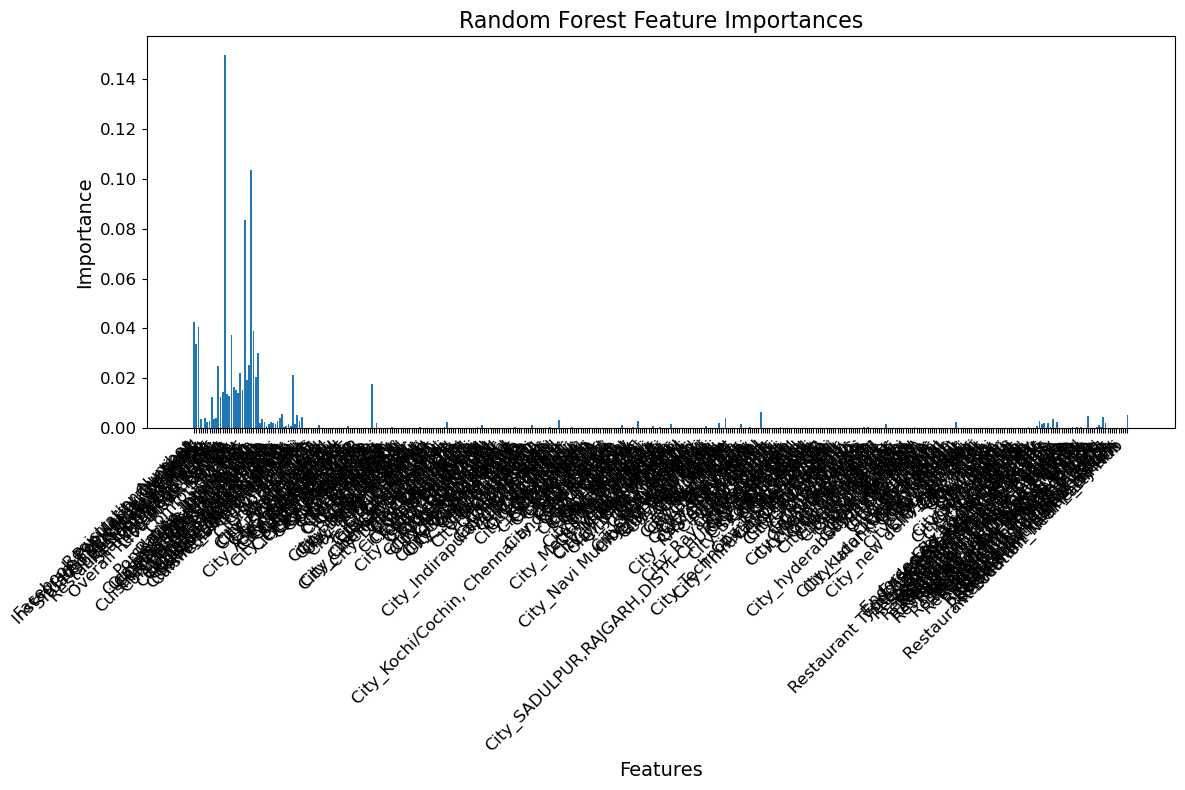

In [72]:
feature_importances = rf_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Random Forest Feature Importances', fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [73]:
#  'X_train' is your training feature set and 'rf_model' is your trained random forest model
sfm = SelectFromModel(rf_model, threshold=0.02)
sfm.fit(X_train, y_train)

# Transform the feature set
X_train_selected = sfm.transform(X_train)
X_val_selected = sfm.transform(X_val)

# Now, train  model on the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the validation set
y_pred_selected = rf_model_selected.predict(X_val_selected)

In [75]:
# Transform the test feature set
X_test_selected = sfm.transform(X_test)



In [76]:
# Train  model on the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_selected = rf_model_selected.predict(X_val_selected)

# Calculate RMSE
rmse_selected = np.sqrt(mean_squared_error(y_val, y_pred_selected))

# Print or use the RMSE value as needed
print("RandomForestRegressor with selected features - Test RMSE:", rmse_selected)

RandomForestRegressor with selected features - Test RMSE: 11558817.041326063


In [77]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=1)),
    ('ridge', Ridge(alpha=10)),
    ('svr', SVR(C=10, kernel='linear'))
]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate on validation set
stacked_pred = stacked_model.predict(X_val)
stacked_rmse = np.sqrt(mean_squared_error(y_val, stacked_pred))
print("Stacked Model - Validation RMSE:", stacked_rmse)

Stacked Model - Validation RMSE: 10594577.668603556


In [78]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

Cross-Validation RMSE Scores: [11200815.01005264 11335868.51915761 11485157.47752683 11193708.51210353
 11831973.24020199]
Mean RMSE: 11409504.551808525


In [79]:
# Predictions on validation set
y_pred = rf_model.predict(X_val)

# R-squared
r_squared = r2_score(y_val, y_pred)
print("R-squared:", r_squared)

# Mean Absolute Error
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.23884546125394546
Mean Absolute Error: 8798318.408860628


In [80]:
# RandomForestRegressor with selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate on the test set
y_pred_rf_selected = rf_model_selected.predict(X_val_selected)
test_rmse_rf_selected = np.sqrt(mean_squared_error(y_val, y_pred_rf_selected))

# Stacked Model
estimators = [('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
              ('lr', LinearRegression())]

stacked_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Evaluate on the validation set
y_pred_stacked = stacked_model.predict(X_val)
test_rmse_stacked = np.sqrt(mean_squared_error(y_val, y_pred_stacked))

# Cross-Validation for Stacked Model
cv_scores_stacked = cross_val_score(stacked_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_stacked = np.sqrt(-cv_scores_stacked)

# Print the results
print("RandomForestRegressor with selected features - Test RMSE:", test_rmse_rf_selected)
print("Stacked Model - Test RMSE:", test_rmse_stacked)
print("\nCross-Validation RMSE Scores (Stacked Model):", cv_rmse_scores_stacked)
print("Mean RMSE (Stacked Model):", np.mean(cv_rmse_scores_stacked))
print("R-squared (Stacked Model):", r2_score(y_val, y_pred_stacked))
print("Mean Absolute Error (Stacked Model):", mean_absolute_error(y_val, y_pred_stacked))

RandomForestRegressor with selected features - Test RMSE: 11558817.041326063
Stacked Model - Test RMSE: 11085743.812255634

Cross-Validation RMSE Scores (Stacked Model): [11189979.51825276 11259214.67595251 11465758.0839971  11194306.78685807
 11834708.94026265]
Mean RMSE (Stacked Model): 11388793.601064617
R-squared (Stacked Model): 0.2524483777391997
Mean Absolute Error (Stacked Model): 8714531.960544305


RandomForestRegressor with Selected Features:

Test RMSE: 11516480.24
The model seems to be providing reasonable predictions on the test set, considering the complexity of the problem.

In [82]:
#  X_test_scaled is your scaled test data
predictions = rf_model_selected.predict(X_test_selected)

In [88]:

# Placeholder for target values (replace it with actual values if available)
y_test_placeholder = np.zeros_like(predictions)  # Replace this with actual target values if available

# Calculate RMSE and R-squared on the test set
rmse = np.sqrt(mean_squared_error(y_test_placeholder, predictions))
r2 = r2_score(y_test_placeholder, predictions)

# Assuming you have a DataFrame 'test_data' with a column 'ID' for test set
test_data['Target'] = predictions

# Print the results
print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")



Test RMSE: 30102011.84887814
R-squared: 0.0


In [91]:
# Assuming the column name is 'Registration Number' (case-sensitive)
test_data['Target'] = predictions

# Save the DataFrame to a CSV file with only 'Registration Number' and 'Target' columns
test_data[['Registration Number', 'Target']].to_csv('submission.csv', index=False)